In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.animation import FuncAnimation  
import matplotlib.ticker as ticker


In [2]:
y = np.linspace(1.5, 2.5, 20)
x = np.linspace(-1, 1, 20)

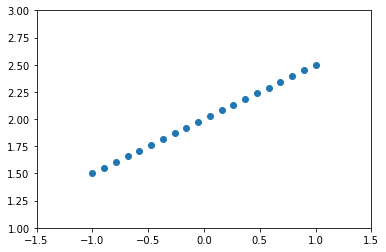

In [3]:
plt.xlim(-1.5, 1.5)
plt.ylim(1, 3)
plt.scatter(x, y)

In [4]:
a = np.arange(-80, 80, 2)
b = np.arange(-60, 60, 2)

In [5]:
# partial_loss = np.array([curr_y - ((av * curr_x) + bv) for curr_x, curr_y in zip(x, y)])
def calculate_loss(w1, w2):
    return sum([pow((curr_y - (curr_x*w1 + w2)), 2) for curr_x, curr_y in zip(x,y)])

In [6]:
def calculate_gradient(w1, w2, l_r):
    d_w2 = sum([2 * (curr_y - (curr_x*w1 + w2)) * -1 * w2 for curr_x, curr_y in zip(x,y)])
    d_w1 = sum([2 * (curr_y - (curr_x*w1 + w2)) * -1 * curr_x for curr_x, curr_y in zip(x,y)])
    w1_ = w1 - l_r * d_w1
    w2_ = w2 - l_r * d_w2
    return w1_, w2_

In [7]:
def calculate_gradient_momentum(w1, w2, l_r, mom, pre_d_w1, pre_d_w2):
    d_w2 = pre_d_w2 * mom - l_r * sum([2 * (curr_y - (curr_x*w1 + w2)) * -1 * w2 for curr_x, curr_y in zip(x,y)])
    d_w1 = pre_d_w1 * mom - l_r * sum([2 * (curr_y - (curr_x*w1 + w2)) * -1 * curr_x for curr_x, curr_y in zip(x,y)])
    w1_ = w1 + d_w1
    w2_ = w2 + d_w2
    return w1_, w2_, d_w1, d_w2

In [122]:
xx = np.zeros((len(a),len(b)),dtype='d')
yy = np.zeros((len(a),len(b)),dtype='d')
zz = np.zeros((len(a),len(b)),dtype='d')
# populate x,y,z arrays
for i, curr_a in enumerate(a):
    for j, curr_b in enumerate(b):
        xx[i,j] = curr_a
        yy[i,j] = curr_b
        zz[i,j] = sum([pow((curr_x*curr_a + curr_b - curr_y), 2) for curr_x, curr_y in zip(x,y)])
xx_ = xx.flatten()
yy_ = yy.flatten()
zz_ = zz.flatten()

In [123]:
curr_w1 = 80
curr_w2 = 60
w1_s = [curr_w1]
w2_s = [curr_w2]
loss_s = [calculate_loss(curr_w1, curr_w2)]
while calculate_loss(curr_w1, curr_w2) > 0.001 :
    curr_w1, curr_w2 = calculate_gradient(curr_w1, curr_w2, 0.00001)
    curr_loss = calculate_loss(curr_w1, curr_w2)
    w1_s.append(curr_w1)
    w2_s.append(curr_w2)
    loss_s.append(curr_loss)

In [124]:
curr_w1 = 80
curr_w2 = 60
curr_d_w1, curr_d_w2 = 0, 0
w1_s_mom = [curr_w1]
w2_s_mom = [curr_w2]
loss_s_mom = [calculate_loss(curr_w1, curr_w2)]
while calculate_loss(curr_w1, curr_w2) > 0.001 :
    curr_w1, curr_w2, curr_d_w1, curr_d_w2 = calculate_gradient_momentum(curr_w1, curr_w2, 
                                                                         0.00001, 0.8, 
                                                                         curr_d_w1, curr_d_w2)
    curr_loss = calculate_loss(curr_w1, curr_w2)
    w1_s_mom.append(curr_w1)
    w2_s_mom.append(curr_w2)
    loss_s_mom.append(curr_loss)

In [125]:
# needed steps to obtain error near 0 (<= 0.001) for the two methods
print("Normal Gradient Descent:", len(loss_s), "| Gradient Descent with momentum:", len(loss_s_mom))

Normal Gradient Descent: 59903 | Gradient Descent with momentum: 11947


In [126]:
# For visualization purpose and to speed up animation 
# Get indexes that correspond to a constant norm from the 30th index

In [127]:
def norm(x1, y1, z1):
    return np.sqrt(pow(x1, 2) + pow(y1, 2) + pow(z1, 2))

norm_ = [norm(w1_s[i], w2_s[i], loss_s[i]) for i in range(len(loss_s))]

In [128]:
prev_val = norm_[29]
first_diff = norm_[28] - prev_val
print(first_diff)
indexes = [i for i in range(30)]
for i, v in enumerate(norm_[30:]):
    if (prev_val - v) >= first_diff:
        indexes.append(i+30)
        prev_val = v
print(indexes)
    

690.3376704811963
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 50, 53, 56, 59, 63, 67, 71, 76, 81, 87, 94, 102, 111, 121, 133, 147, 164, 184, 208, 236, 269, 307, 349, 395, 444, 496, 550, 606, 664, 724, 785, 848, 912, 978, 1045, 1114, 1184, 1256, 1330, 1405, 1482, 1561, 1642, 1725, 1810, 1897, 1987, 2079, 2174, 2271, 2371, 2474, 2580, 2690, 2803, 2920, 3042, 3168, 3299, 3435, 3577, 3725, 3880, 4042, 4212, 4391, 4580, 4780, 4993, 5220, 5463, 5725, 6009, 6319, 6660, 7039, 7466, 7954, 8524, 9210, 10070, 11225, 12989, 16875]


In [129]:
print(len(loss_s), len(loss_s_mom))
difference = len(loss_s) - len(loss_s_mom)
print(difference)
w1_s_mom = w1_s_mom + [w1_s_mom[-1] for i in range(difference)]
w2_s_mom = w2_s_mom + [w2_s_mom[-1] for i in range(difference)]
loss_s_mom = loss_s_mom + [loss_s_mom[-1] for i in range(difference)]
print(len(loss_s), len(loss_s_mom))

def reduce_size(list_, indexes=indexes):
    list_n = [v for i, v in enumerate(list_) if i in indexes] + list_[-1]
    return list_n

w1_s = reduce_size(w1_s)
w2_s = reduce_size(w2_s)
loss_s = reduce_size(loss_s)

w1_s_mom = reduce_size(w1_s_mom)
w2_s_mom = reduce_size(w2_s_mom)
loss_s_mom = reduce_size(loss_s_mom)
print(len(loss_s_mom))

59903 11947
47956
59903 59903
123


In [130]:
def update_plot_3d(i, lines):
    l1_, l2_, scat1_, scat2_, txt1_, txt2_ = lines
    curr_w1_s = w1_s[:i]
    curr_w2_s = w2_s[:i]
    curr_loss_s = loss_s[:i]
    
    curr_w1_s_mom = w1_s_mom[:i]
    curr_w2_s_mom = w2_s_mom[:i]
    curr_loss_s_mom = loss_s_mom[:i]
    
    txt1_.set_text("CURR LOSS = {}\n l_r = 1 x 10^-5".format(round(loss_s[i], 3)))
    txt2_.set_text("CURR LOSS = {}\n l_r = 1 x 10^-5\n mom = 0.8".format(round(loss_s_mom[i], 3)))
    
    l1_.set_data_3d(curr_w1_s, curr_w2_s, curr_loss_s)
    l2_.set_data_3d(curr_w1_s_mom, curr_w2_s_mom, curr_loss_s_mom)
    scat1_.set_data_3d([w1_s[i]], [w2_s[i]], [loss_s[i]])
    scat2_.set_data_3d([w1_s_mom[i]], [w2_s_mom[i]], [loss_s_mom[i]])
    return (l1_, l2_),

In [131]:
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "{}k".format(int(x//1000))

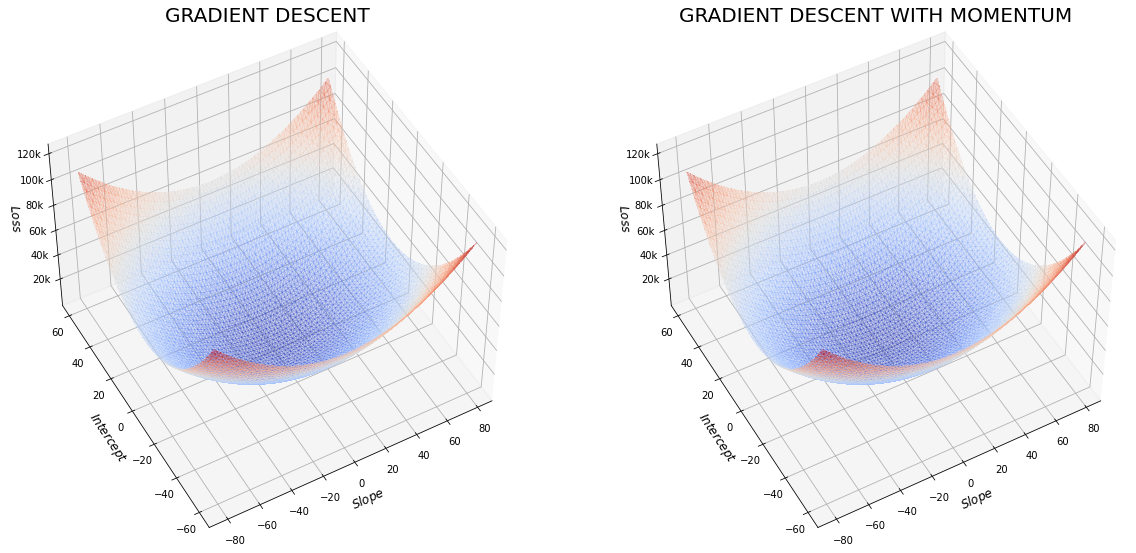

In [132]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_trisurf(xx_, yy_, zz_, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.3)
l1 = ax.plot([], [], [], 'b', alpha=1)[0]
scat1 = ax.plot([], [], [], "o", color='green', markersize=8)[0]
ax.set_title("GRADIENT DESCENT", fontsize=20)
time_text1 = ax.text(0, -110, 10, '', fontsize=14)
ax.set_xlabel('$Slope$', fontsize=12)
ax.set_ylabel('$Intercept$', fontsize=12)
ax.set_zlabel('$Loss$', fontsize=12)
ax.zaxis.set_major_formatter(major_formatter)
ax.view_init(49, -119)

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_trisurf(xx_, yy_, zz_, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.3)
l2 = ax.plot([], [], [], 'b', alpha=1)[0]
scat2 = ax.plot([], [], [], "o", color='red', markersize=8)[0]
ax.set_title("GRADIENT DESCENT WITH MOMENTUM", fontsize=20)
time_text2 = ax.text(0, -110, 10, '', fontsize=14)
ax.set_xlabel('$Slope$', fontsize=12)
ax.set_ylabel('$Intercept$', fontsize=12)
ax.set_zlabel('$Loss$', fontsize=12)
ax.zaxis.set_major_formatter(major_formatter)
ax.view_init(49, -119)




In [133]:
grad_vs_gradmom = FuncAnimation(fig, update_plot_3d, len(loss_s), fargs=((l1, l2, scat1, scat2, 
                                                                          time_text1, time_text2),))
grad_vs_gradmom.save('momentum.mp4', writer='ffmpeg', fps=30)